In [1]:
import numpy as np
import cmath
from scipy import signal
from scipy.io import wavfile
import matplotlib
import matplotlib.pyplot as plt
import math
import warnings; warnings.simplefilter('ignore') # Para quitar mensajes de warning
import upv_audio 
matplotlib.rcParams['figure.figsize'] = (15, 8)

import UPVlog

np.set_printoptions(precision=3)

mylogger=UPVlog.UPVlog("Intro Analisis Espectral")

# Introducción al análisis espectral
## Introducción
El objetivo de este primer cuaderno es introducir el fundamento de cómo dada una señal (fragmento de) es posible averiguar su espectro.

El proceso consiste en:

1. Suponiendo conocida las frecuencias determinar la amplitud y la fase.

2. Normalmente la frecuencia no es conocida. Para ello :
  
  * repetiremos el paso anterior "barriendo" en frecuencia.
  
  * En aquellas frecuencias en las que no existía sinusoide simplemente obtendremos amplitud nula.
  
Inicialmente supondremos que la señal es muuuy larga.

Luego veremos qué sucede cuando es de duración limitada (caso habitual)

___________________



### Generación de suma de sinusoides

Supondremos una señal 

* compuesta por la suma de 3 tonos, de distintas amplitudes frecuencias y fases.

* La duración la tomaremos muuy larga

* La frecuencia de muestreo supondremos que es suficientemente alta como para no tener aliasing.

El objetivo será:

> A partir de las muestras de las sinusoides...
> 
> ... Conocer amplitudes, frecuencias y  fases de cada una de las sinusoides que componen la señal.

In [2]:
# Datos de las 3 sinusoides
A1=0.4 
f1=300.0 # hz
phi1= 0.0

A2=0.2
f2=96.0 # hz
phi2= np.pi/3 # radianes

A3=0.35 
f3=503.0 # hz
phi3= -np.pi # radianes

fs=16000.0

dur=1#sg

In [3]:
# Generación de las sinusoides y suma
nmues = int(fs*dur)
n=np.arange(nmues)
Ts=1.0/fs
nTs = n*Ts
s1=A1*np.cos( 2*np.pi * f1 *nTs + phi1)
s2=A2*np.cos( 2*np.pi * f2 *nTs + phi2)
s3=A3*np.cos( 2*np.pi * f3 *nTs + phi3)

s= s1+s2+s3

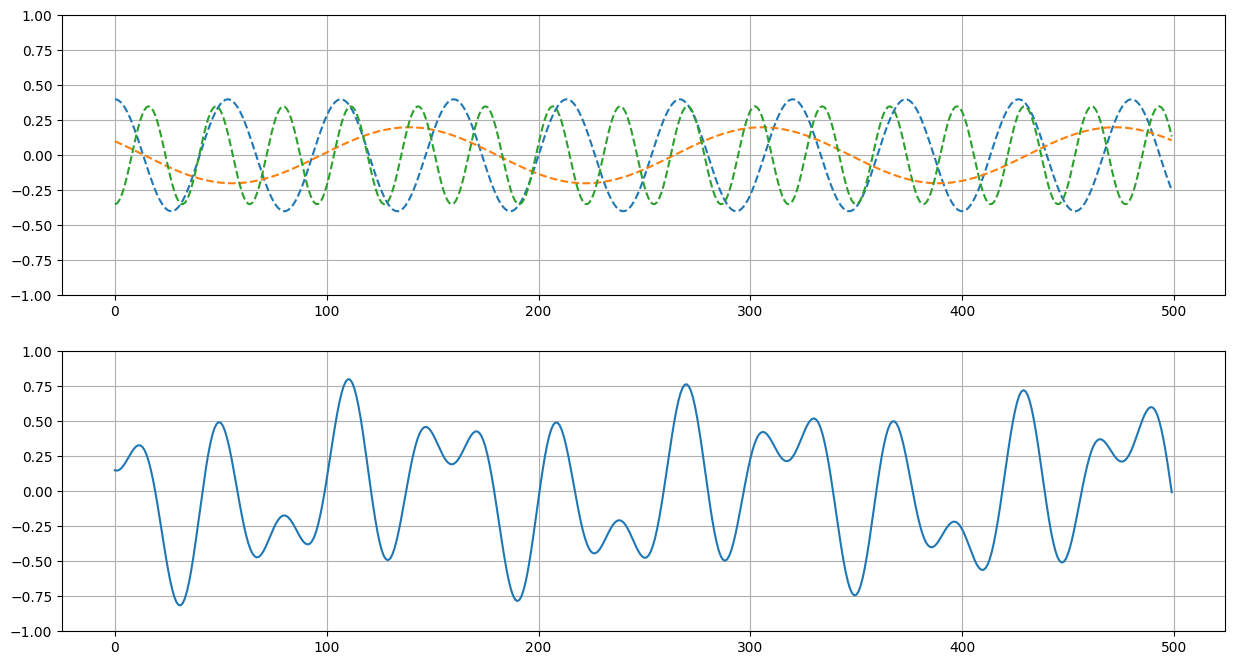

In [4]:
# Representación gráfica de las 3 sinusoides y su suma
_=plt.subplot(2,1,1)
_=plt.plot(s1[:500],linestyle='dashed')
_=plt.plot(s2[:500],linestyle='dashed')
_=plt.plot(s3[:500],linestyle='dashed')
_=plt.ylim([-1,1])
_=plt.grid()
_=plt.subplot(2,1,2)
_=plt.plot(s[:500],linestyle='solid')
_=plt.ylim([-1,1])
_=plt.grid()

### Sumas de fasores

Cada sinusoide {$A_k, f_k,\, \phi_k$} se puede poner como suma de dos fasores:

* $A_k/2,\, f_k,\,  \phi _k$
* $A_k/2,\, -f_k,\, -\phi_k$

Lo que haremos será **determinar los parámetros de los fasores** en vez de los de la sinusoide.

$$ x(t) = \frac{A_1}{2} e^{j\omega _1 t + \phi_1} +  \frac{A_1}{2}  e^{-j\omega _1 t - \phi_1} + 
\frac{A_2}{2} e^{j\omega _2 t + \phi_2} +  \frac{A_2}{2}  e^{-j\omega _2 t - \phi_2} +
\frac{A_3}{2} e^{j\omega _3 t + \phi_3} +  \frac{A_3}{2}  e^{-j\omega _3 t - \phi_3} $$


## Estima de parámetros espectrales conocida la frecuencia

Para determinar la amplitud del fasor de frecuencia $f_1$ lo que haremos es calcular medio de la señal $x(t)$ por 
$e^{-j\omega _1 t}$:

$$ x(t)\, e^{-j\omega _1 t} = \frac{A_1}{2} e^{ \phi_1} +  \frac{A_1}{2}  e^{-j\omega _1 t -j\omega _1 t  - \phi_1} + 
\frac{A_2}{2} e^{j\omega _2 t -j\omega _1 t + \phi_2} +  \frac{A_2}{2}  e^{-j\omega _2 t -j\omega _1 t - \phi_2} +
\frac{A_3}{2} e^{j\omega _3 t -j\omega _1 t + \phi_3} +  \frac{A_3}{2}  e^{-j\omega _3 t -j\omega _1 t - \phi_3} $$

Cuyo valor medio vale

$$ \left< x(t)\, e^{-j\omega _1 t} \right> = \frac{A_1}{2} e^{ \phi_1} $$


A continuación aplicaremos esta idea para ver qué se obtiene.

Estamos suponiendo que **las frecuencias de momento son conocidas**

Implementaremos esta idea en Python

In [6]:
mylogger.log("Estimando A1")
# Empezaremos por f1


fasor = None # Generar fasor e^(-j w1 n)
A1est = None # amplitud compleja estimada

### BEGIN SOLUTION
# Esto se lo hacemos en clase

# Generamos fasor
f=f1/fs
fasor = np.exp(-1j*2.0*np.pi*f*n)
# Calculamos la media de la señal por el fasor
A1est = np.mean(fasor * s)
### END SOLUTION




In [7]:
mylogger.log("Testing Estimando A1")

# Imprimimos Módulo y fase

print(f'Módulo:{np.abs(A1est):.3f}, fase: {np.angle(A1est):.3f}')
print(f'A1-verdadero:{A1:.3f}, phi1-verdadero: {phi1:.3f}')

### BEGIN TESTS
assert fasor is not None and A1est is not None
### END TESTS

# Hay tests ocultos para comprobar valor correcto
### BEGIN HIDDEN TESTS
assert np.abs(A1est-0.2) < 1e-5
### END HIDDEN TESTS

mylogger.log("Success Testing Estimando A1")

Módulo:0.200, fase: 0.000
A1-verdadero:0.400, phi1-verdadero: 0.000


_________________________________________ 


Observamos que:

* Partiendo de la señal sumada "s"

* Suponiendo conocida la frecuencia de la componente , hemos determinado su amplitud (la mitad de) y su fase.

Repitamos con las otras dos frecuencias:



In [35]:
mylogger.log("Estimando A2 y A3")

# Estimar la amplitud compleja de f2 y f3
A2est = None # Debe ser un complejo correspondiente a la amplitud compleja del fasor de frecuencia f2
### BEGIN SOLUTION
# Este lo hacen ellos en clase
f=f2/fs
fasor = np.exp(-1j*2.0*np.pi*f*n)
A2est = np.mean(fasor * s)
### END SOLUTION

A3est = None # Debe ser un complejo correspondiente a la amplitud compleja del fasor de frecuencia f3
### BEGIN SOLUTION
# Este lo hacen ellos en clase
f=f3/fs
fasor = np.exp(-1j*2.0*np.pi*f*n)
A3est = np.mean(fasor * s)
### END SOLUTION


In [36]:
mylogger.log("Testing Estimando A2 y A3")

# Imprimimos Módulo y fase

print(f'Módulo:{np.abs(A2est):.3f}, fase: {np.angle(A2est):.3f}')
print(f'A2-verdadero:{A2:.3f}, phi2-verdadero: {phi2:.3f}')
print('')

print(f'Módulo:{np.abs(A3est):.3f}, fase: {np.angle(A3est):.3f}')
print(f'A3-verdadero:{A3:.3f}, phi3-verdadero: {phi3:.3f}')

### BEGIN TESTS
assert A2est is not None and  A3est is not None, "Completar celda anterior"
### END TESTS

# Hay tests ocultos para comprobar valor correcto
### BEGIN HIDDEN TESTS
assert np.abs(A2est-A2/2*cmath.exp(1j*phi2)) < 1e-5
assert np.abs(A3est-A3/2*cmath.exp(1j*phi3)) < 1e-5
### END HIDDEN TESTS

mylogger.log("Success Testing Estimando A2 y A3")

Módulo:0.100, fase: 1.047
A2-verdadero:0.200, phi2-verdadero: 1.047

Módulo:0.175, fase: 3.142
A3-verdadero:0.350, phi3-verdadero: -3.142


_________________________________________ 


Observamos que al igual que ocurría en el primer caso las amplitudes y las fases coinciden con las reales salvo por un factor "2"

Hasta ahora, las frecuencias para las que hemos obtenido la amplitud compleja, **formaban parde de la señal**.

En la práctica **NO se conocen las frecuencias presentes en la señal**

Veamos qué sucede si le pongo una frecuencia diferente:

    

In [40]:
# Veamos que pasa si pongo una frecuencia que no sea de las que forman parte de la señal
f=1400/fs
fasor = np.exp(-1j*2.0*np.pi*f*n)
A4est = np.mean(fasor * s)
print(f'frec = {1400} ==> Módulo:{np.abs(A4est):.3f}')

frec = 1400 ==> Módulo:0.000


**<span style="font-size: 24px;">Observaciones</span>**




Vemos que:
* al preguntarle por la amplitud de una frecuencia que no existe ....
*
* ... el valor obtenido es prácticamente 0 !!!

_______________________________________

## Barrido en frecuencia

En la práctica:

* solo se dispone de las muestras de la señal a analizar, *s*

* Las frecuencias del cocktail se desconocen.

Lo que se hace es un *barrido en frecuencia*

In [44]:
# Creamos vector de frecuencias en las que probaremos
frecuencias =np.arange(0,600)
Ts = 1/fs
t= n*Ts

# Repetimos los cálculos anteriores para cada frecuencia
amplitudes_complejas=[]
for f in frecuencias:
    fasor = np.exp(-1j*2.0*np.pi*f*t)

    Aest = 0 # Determinar el valor correcto de Aest
    # BEGIN SOLUTION
    # Se lo podemos hacer en clase
    Aest = np.mean(fasor * s)
    ### END SOLUTION
    
    amplitudes_complejas.append(Aest)
amplitudes_complejas=np.array(amplitudes_complejas)



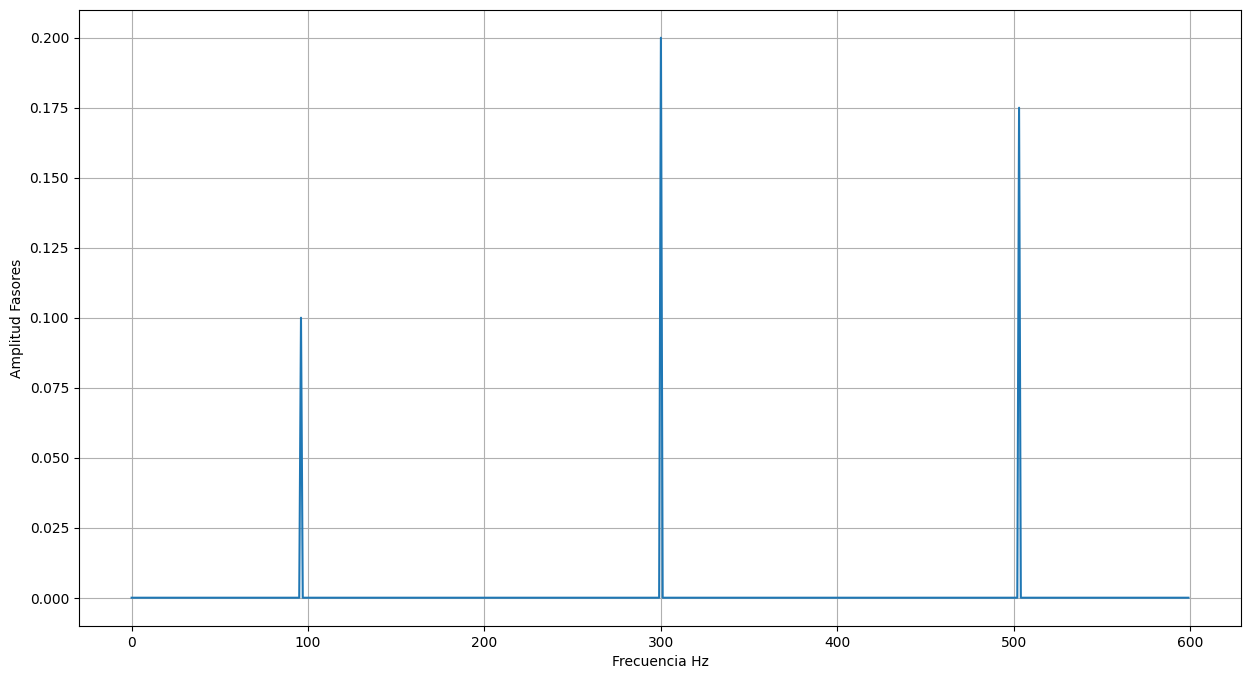

In [45]:
mylogger.log("Testing barrido en frecuencia")

### BEGIN TESTS
assert np.max(np.abs(amplitudes_complejas))>0.1,"Complete celda anterior"

### END TESTS

mylogger.log("Success Testing barrido en frecuencia")
_=plt.plot(frecuencias,np.abs(amplitudes_complejas))
_=plt.grid()
_=plt.xlabel('Frecuencia Hz')
_=plt.ylabel('Amplitud Fasores')

### Observaciones

* Vemos que barriendo en frecuencia podemos obtener ***el espectro***.

* El espectro son números complejos

  * El módulo es la amplitud
  
  * El argumento es la fase

* Para cada frecuencia tengo que hacer la media de la señal por un fasor.

* Las frecuencias a ensayar se suelen tomar equiespaciadas

### Ejercicio
A continuación programará una función que integre los anteriores cálculos

In [46]:
def espectro(s,frecuencias,fs):
    '''
    Función que estima el espectro

        s: muestras de la señal
        frecuencias: vector con las frecuencias a las que se desea estimar el espectro
        fs: frecuencia de muestreo

    Devuelve:
        vector con las amplitudes complejas
    '''

    lens = len(s)
    n= np.arange(lens)
    Ts = 1/fs
    t = n*Ts
    amplitudes_complejas=[]
### BEGIN SOLUTION
    for f in frecuencias:
        fasor = np.exp(-1j*2.0*np.pi*f*t)
        Aest = np.mean(fasor * s)
        amplitudes_complejas.append(Aest)
### END SOLUTION    

    amplitudes_complejas=np.array(amplitudes_complejas)
    return amplitudes_complejas
    


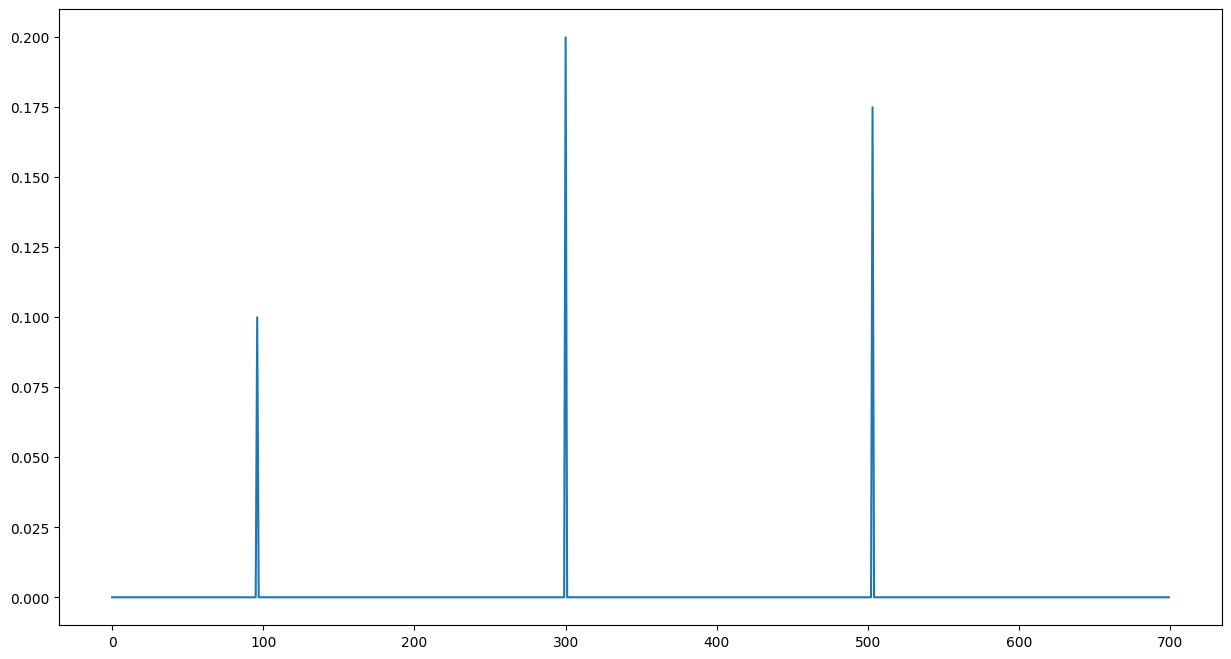

In [51]:
mylogger.log("Testing espectro()")
fs=16000
frecuencias = np.arange(0,700)

E=espectro(s,frecuencias,fs)

### BEGIN TESTS
assert len(E) >0, "Función incompleta"
assert len(E) ==len(frecuencias), "Revisar función"
assert np.max(np.abs(E))> 0.1,"Revisar función"
assert np.min(np.abs(E))< 1e-5,"Revisar función"
### END TESTS

_=plt.plot(frecuencias,np.abs(E))

# Hay más comprobaciones ocultas
### BEGIN HIDDEN TESTS
np.random.seed(18)
xt=np.random.randn(3000)
fs=1
frecuencias = np.linspace(0.1,0.4)
# AUTOTEST espectro(xt,frecuencias,fs)
### END HIDDEN TESTS
mylogger.log("Success Testing espectro()")

_____________________________


## DFT/FFT

* Calcular la media es lo mismo que calcular la suma y luego dividir por el número de valores

* La suma anterior, cuando las frecuencias están equiespaciadas se puede calcular mediante DFT

 $$ X[k] = \sum _ {n=0} ^{L-1} x[n] \, \exp (- 2 j \pi \frac{k }{L} n)$$
 
* Operación que dadas L muestras devuelve las amplitudes (complejas) de L fasores de frecuencias equiespaciadas $f_k= k/L$

* Las amplitudes de los fasores se obtienen mediante $A[k]= 1/L X[k]$ (
  
  * el 1/L es para calcular media en vez de suma
  
* la DFT:
   * está implementada en numpy
   * Existe método cálculo rápido *FFT*. Especialmente eficiente si $L=2^\nu$ con $\nu$ entero.
* Relleno por ceros. Es posible reducir el espaciado en frecuencia, extentiendo la señal con ceros

In [80]:
def espectroFFT(x, NFFT=None):
    
    # Si no damos NFFT es directamente la longitud de la señal
    L=len(x)
    if NFFT==None:
        NFFT = L 
       
    # Comprobamos que NFFT sea mayor que la longitud de x.
    assert L<=NFFT, 'NFFT tiene que ser mayor o igual a que len(x)'

    # Calculamos la FFT. Se rellena con ceros desde L a NFFT 
    X = np.fft.fft(x,NFFT)
    A=np.zeros_like(X)
    A[1:]=2/L*np.abs(X[1:]) # El 2 es para pasar de ampl-fasores a ampl-cosenos
    A[0]=1/L*abs(X[0]) # En la frecuancia 0 no hay 2
   
    # Generamos el eje de frecuencia digital
    fd = np.arange(0, NFFT)/NFFT
    
  # Nos quedamos con la primera mitad (hasta frec 0.5)
    A=A[0:NFFT//2]
    fd=fd[0:NFFT//2]
    
    return A,fd 

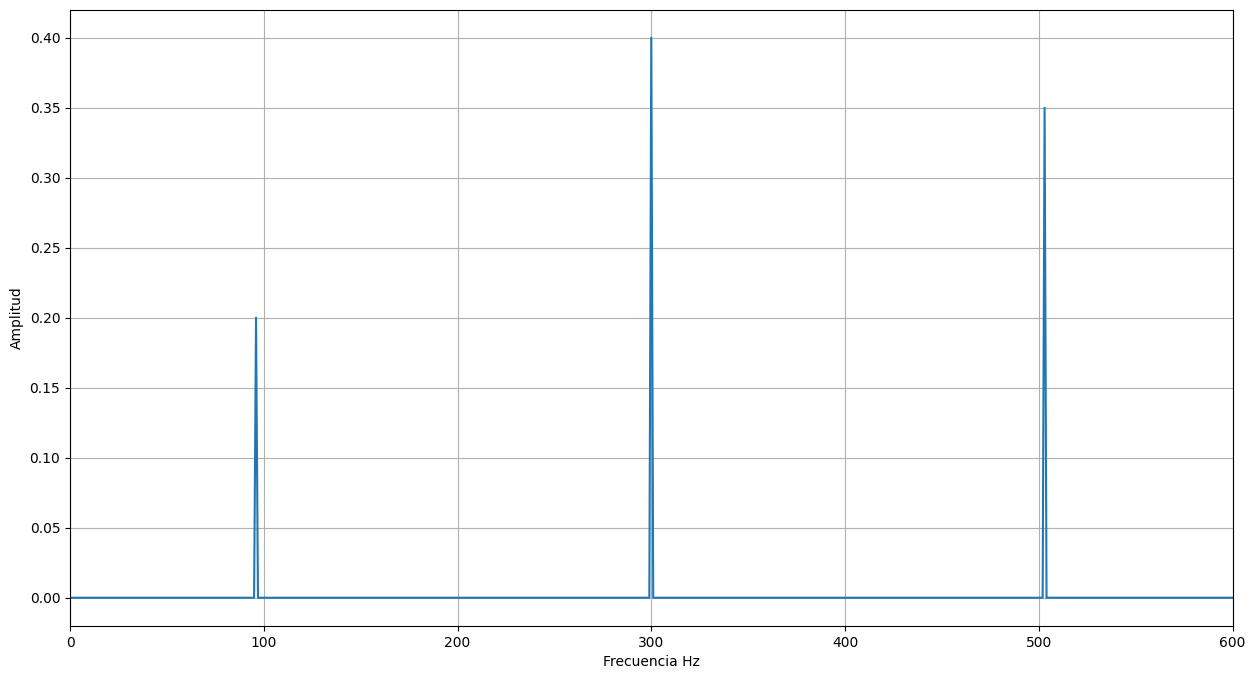

In [67]:
fs=16000
A,fd=espectroFFT(s)
_=plt.plot(fd*fs,A)
_=plt.xlim(0,600)
_=plt.grid()
_=plt.xlabel('Frecuencia Hz')
_=plt.ylabel('Amplitudes cosenos')


**<span style="font-size: 24px;">Observaciones</span>**

Vemos que :

* el resultado de *espectro()* (la nuestra) y *espectroFFT()* coinciden

* Nuestra implementación se basa en un bucle

* La FFT está compilada y optimizada.

Comprobemos que el tiempo de cálculo (**para el mismo resultado**) es mucho menor con la FFT:


In [79]:
mylogger.log("Tiempos espectroFFT()")
%timeit -r 2 -n 1000 A,fd=espectroFFT(s)


160 µs ± 871 ns per loop (mean ± std. dev. of 2 runs, 1,000 loops each)


In [78]:
mylogger.log("Tiempos espectro()")
frecuencias=np.arange(len(s)//2)/len(s)
%timeit -r 2 -n 3 E=espectro(s,frecuencias,1)

2.32 s ± 12.9 ms per loop (mean ± std. dev. of 2 runs, 3 loops each)
